In [1]:
%pylab inline
import bisect

Populating the interactive namespace from numpy and matplotlib


In [2]:
day      = 24*60*60 # s
year     = 365.25 * day
AU       = 1.4959787e+11 # m
G        = 6.67384e-11 # m^3 / kg s^2

M_sun    = 1.9891e+30 # kg
M_earth  = 5.9742412e+24 # kg
M_mars   = 6.4171e+23 # kg
M_probe  = 1000 # kg

R_earth  = 1 * AU
R_mars   = 1.5235 * AU

r_earth  = 6371010 # m
r_mars   = 3389500 # m

Y_earth  = year
Y_mars   = 686.971 * day

In [3]:
r0 = AU
v0 = 2*pi*r0/year
dt0 = 60*60

In [429]:
t = 0
t_sample = -inf
x = asarray([AU,0,0])
v = asarray([0,2*pi*R_earth/year,0])

xm = asarray([R_mars,0,0])
vm = asarray([0,2*pi*R_mars/Y_mars,0])

all_t = []
all_x = []
all_v = []
all_a = []

all_xm = []

while t<10*year:
    r = norm(x)
    ux = x/r
    
    rm = norm(xm)
    uxm = xm/rm
    
    x_rel = x-xm
    r_rel = norm(x_rel)
    ux_rel = x_rel/r_rel
    
    a = -G*(M_sun*ux/r**2 + M_mars*ux_rel/r_rel**2)
    am = -G*(M_sun*uxm/rm**2 - M_probe*ux_rel/r_rel**2)

    dt = dt0 if norm(a)<0.01 else dt0/1000
    dt = dt if norm(a)<1 else dt0/100000
    
    boost = False
    t_go = 1.351622*year  # doesn't hit surface
#    t_go = 1.35164*year    # deep below surface
#    t_go = 1.351646*year  # deep deep deep - if mars were a black hole
#    t_go = 1.351671*year  # doesn't hit surface, but on other side
    t_go = 1.3*year
#    t_go = 1.370281*year  # doesn't hit surface - returning
    t_go = 1.370331*year  # doesn't hit surface - returning / other side
    if(t<t_go and t+dt>=t_go):
        dt = t_go-t
        t = t_go
        boost = True
    else:
        t += dt
        
    if(t_go<0 and t_go+dt>=0):
        v *= 1.1

    v += a*dt
    x += v*dt

    vm += am*dt
    xm += vm*dt

    if boost:
        v *= 1.1
    
    all_a.append(a.copy())
    all_v.append(v.copy())
    all_x.append(x.copy())

#    all_vm.append(vm.copy())
    all_xm.append(xm.copy())

    all_t.append(t)
    t_sample = t

all_t = asarray(all_t)

all_x = column_stack(all_x)
all_v = column_stack(all_v)
all_a = column_stack(all_a)

all_xm = column_stack(all_xm)
#all_v_mars = column_stack(all_v_mars)

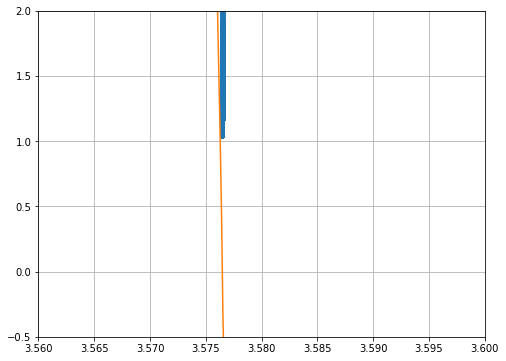

In [430]:
all_x_rel = all_x - all_xm
figure(figsize(8,6))
plot(all_t/year,norm(all_x_rel,axis=0)/r_mars,'.')
plot(all_t/year,(arctan2(all_x[1,:],all_x[0,:])-arctan2(all_xm[1,:],all_xm[0,:]))*10000)
#axis([3.415,3.416,-0.5,2])
axis([3.56,3.6,-0.5,2])
grid()

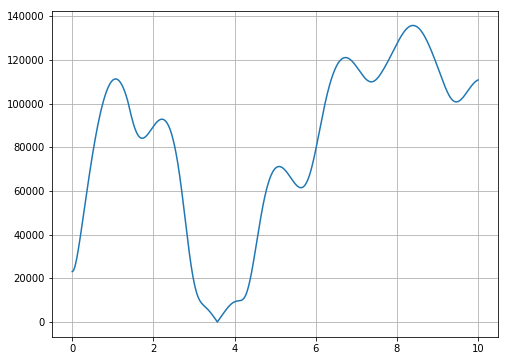

In [431]:
all_x_rel = all_x - all_xm
figure(figsize(8,6))
plot(all_t/year,norm(all_x_rel,axis=0)/r_mars)
grid()

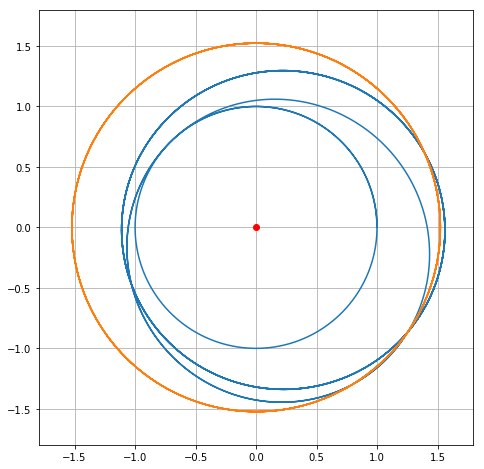

In [432]:
figure(figsize(8,8))
plot(all_x[0,:]/AU, all_x[1,:]/AU)
plot(all_xm[0,:]/AU, all_xm[1,:]/AU)
plot(0,0,'or')
axis('square')
axis(asarray([-1,1,-1,1])*max(norm(all_x, axis=0))/AU*1.15)
#axis(asarray([0.63,0.640,-1.390,-1.380]))
#axis(asarray([0.62,0.650,-1.400,-1.370]))
#axis(asarray([1.24,1.26,-0.88,-0.86]))
grid()

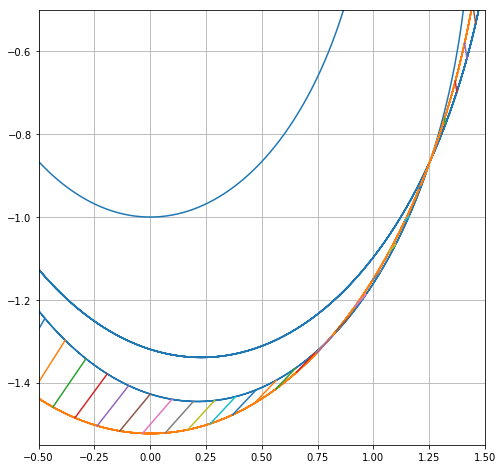

In [443]:
figure(figsize(8,8))
plot(all_x[0,:]/AU, all_x[1,:]/AU)
plot(all_xm[0,:]/AU, all_xm[1,:]/AU)
axis(asarray([1.32,1.36,-0.775,-0.700]))
for it,t in enumerate(arange(3.0,3.8,0.02)):
    i = bisect.bisect(all_t, t*year)
    plot([all_x[0,i]/AU,all_xm[0,i]/AU], [all_x[1,i]/AU,all_xm[1,i]/AU])
#plot(0,0,'or')
#axis('square')
axis(asarray([-1,1,-1,1])*max(norm(all_x, axis=0))/AU*1.15)
axis(asarray([-0.5,1.5,-1.55,-0.5]))
grid()

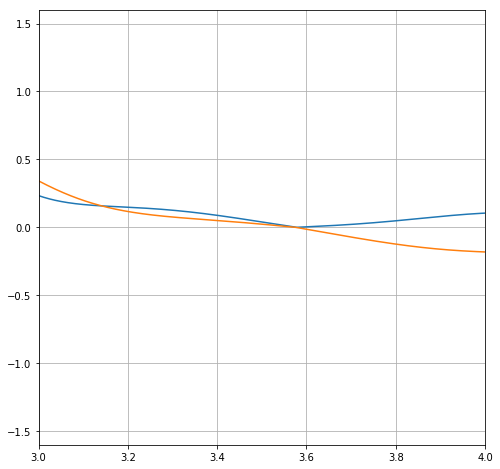

In [434]:
plot(all_t/year, all_x[0,:]/AU - all_xm[0,:]/AU)
plot(all_t/year, all_x[1,:]/AU - all_xm[1,:]/AU)
axis([3,4,-1.6,1.6])
grid()

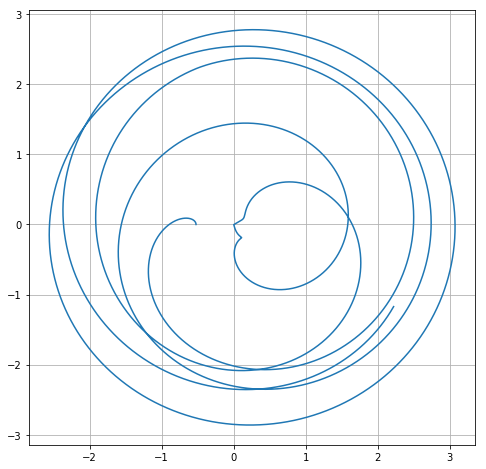

In [442]:
figure(figsize(8,8))
plot((all_x[0,:]-all_xm[0,:])/AU, (all_x[1,:]-all_xm[1,:])/AU)
#axis([-0.001,0.001,-0.001,0.001])
#axis([-0.2,0.2,-0.2,0.2])
grid()

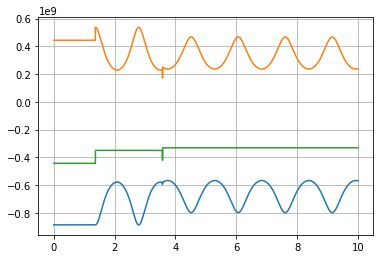

In [436]:
figure(figsize=(6,4))
all_x_rel = all_x - all_xm
ke = 0.5*norm(all_v, axis=0)**2
pe = -G*(M_sun/norm(all_x, axis=0) + M_mars/norm(all_x_rel, axis=0))
plot(asarray(all_t)/year, pe,
     asarray(all_t)/year, ke,
     asarray(all_t)/year, ke + pe)
grid()

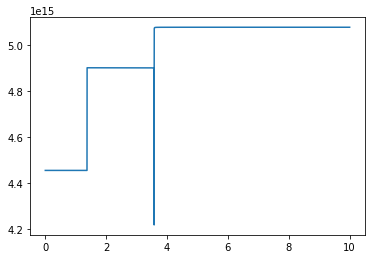

In [437]:
figure(figsize=(6,4))
plot(asarray(all_t)/year, norm(cross(all_x,all_v,axis=0),axis=0))

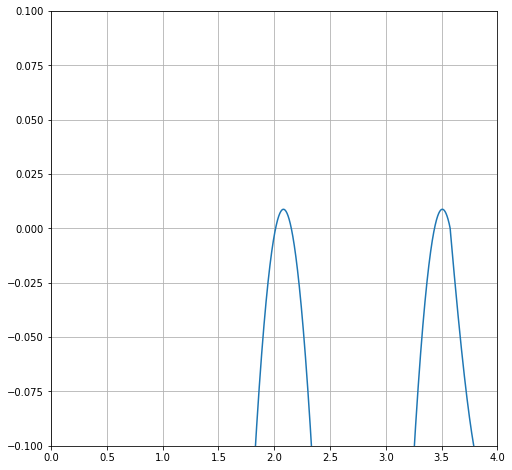

In [409]:
plot(asarray(all_t)/year, (norm(all_x,axis=0)-R_mars)/AU)
axis([0,4,-0.1,0.1])
grid()